# SIWES Project: GPA Analyzer & Future GPA Prediction System

Name: Abdullahi Hashim Bala  
Matric No: 24C-SCT-SEN-0138  
Department: Software Engineering  
School: Cosmopolitan University  
Supervisor: Mr. Michael Okoronu  

This project demonstrates the development of a GPA Analyzer capable of:
- Calculating GPA from a dataset  
- Predicting future GPA based on target CGPA  
- Simulating future courses and estimating grades needed  


## Problem Statement

University students often struggle to calculate their GPA correctly, track academic progress, or estimate the grades needed to reach a target CGPA.

This project solves this problem through:
- Automated GPA calculation  
- Target CGPA estimation  
- Future course simulation to show needed grades  


## Dataset Description

For this project, ChatGPT provided a dataset named sample_grades.csv.  
The dataset contains:

- Course – Course name  
- Units – Credit units  
- Grade – Letter grade received  

The dataset demonstrates GPA calculations and model testing.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv("sample_grades.csv")
df


,Units,Course,Points,Weighted,Grade,Semester
0,3,CHM101,5,15,A,Semester 1
1,3,MTH101,4,12,B,Semester 1
2,2,GST111,5,10,A,Semester 1
3,3,BIO101,3,9,C,Semester 1
4,2,MTH102,4,8,B,Semester 2
5,2,PHY 102,4,8,B,Semester 2
6,3,CHM102,5,15,A,Semester 2
7,2,GST112,3,6,C,Semester 2


In [4]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Units     8 non-null      int64 
 1   Course    8 non-null      object
 2   Points    8 non-null      int64 
 3   Weighted  8 non-null      int64 
 4   Grade     8 non-null      object
 5   Semester  8 non-null      object
dtypes: int64(3), object(3)
memory usage: 516.0+ bytes


,Units,Points,Weighted
count,8.000000,8.000000,8.000000
mean,2.500000,4.125000,10.375000
std,0.534522,0.834523,3.335416
min,2.000000,3.000000,6.000000
25%,2.000000,3.750000,8.000000
50%,2.500000,4.000000,9.500000
75%,3.000000,5.000000,12.750000
max,3.000000,5.000000,15.000000


In [5]:
GRADE_SYSTEMS = {
    "5.0": {
        "A": 5,
        "B": 4,
        "C": 3,
        "D": 2,
        "E": 1,
        "F": 0,
    },
    "4.0": {
        "A": 4,
        "B": 3,
        "C": 2,
        "D": 1,
        "F": 0,
    }
}

grading_scale = GRADE_SYSTEMS["5.0"]
grading_scale


{'A': 5, 'B': 4, 'C': 3, 'D': 2, 'E': 1, 'F': 0}

In [6]:
def calculate_gpa(df, grading_scale):

    df["Points"] = df["Grade"].map(grading_scale)
    df["Weighted"] = df["Points"] * df["Units"]

    semester_gpa = df["Weighted"].sum() / df["Units"].sum()

    return round(semester_gpa, 2)


In [7]:
gpa = calculate_gpa(df, grading_scale)
gpa


np.float64(4.15)

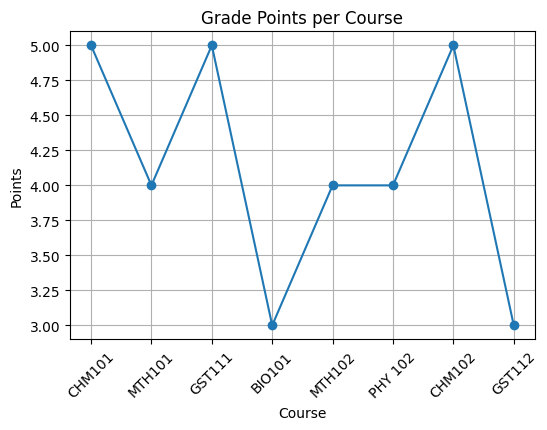

In [8]:
plt.figure(figsize=(6,4))
plt.plot(df["Course"], df["Points"], marker="o")
plt.title("Grade Points per Course")
plt.xlabel("Course")
plt.ylabel("Points")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [9]:
def generate_course_plan(required_gpa, num_courses, units_per_course, grading_scale):

    points_values = sorted(grading_scale.values(), reverse=True)
    grades_keys = list(grading_scale.keys())

    course_plan = []

    total_units = sum(units_per_course)
    total_points_needed = required_gpa * total_units

    remaining_points = total_points_needed

    for i in range(num_courses):
        units = units_per_course[i]
        avg_points_course = remaining_points / sum(units_per_course[i:])

        closest_points = min(points_values, key=lambda x: abs(x - avg_points_course))
        grade = [k for k, v in grading_scale.items() if v == closest_points][0]

        course_plan.append({
            "Course": f"Course {i+1}",
            "Units": units,
            "Grade": grade,
            "Points": closest_points,
            "Weighted": closest_points * units
        })

        remaining_points -= closest_points * units

    return pd.DataFrame(course_plan)


In [10]:
target_cgpa = 4.5
num_courses = 5
units_list = [3, 3, 2, 3, 1]

required_gpa = 4.2

course_plan_df = generate_course_plan(required_gpa, num_courses, units_list, grading_scale)
course_plan_df


,Course,Units,Grade,Points,Weighted
0,Course 1,3,B,4,12
1,Course 2,3,B,4,12
2,Course 3,2,B,4,8
3,Course 4,3,A,5,15
4,Course 5,1,C,3,3


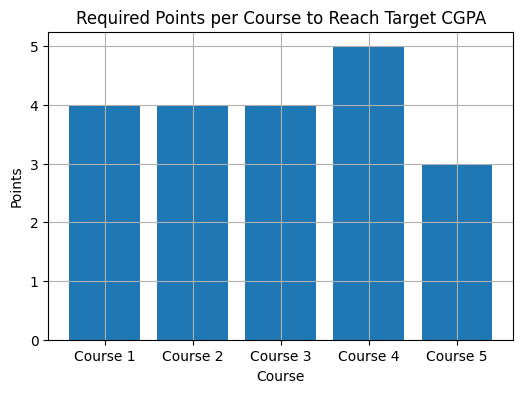

In [11]:
plt.figure(figsize=(6,4))
plt.bar(course_plan_df["Course"], course_plan_df["Points"])
plt.title("Required Points per Course to Reach Target CGPA")
plt.xlabel("Course")
plt.ylabel("Points")
plt.grid(True)
plt.show()


## Conclusion

This SIWES project implemented a functional GPA Analysis system capable of:

- Computing GPA from academic records  
- Visualizing grade performance  
- Predicting grades needed to reach a target CGPA  
- Generating a detailed course plan for improvement  

It applies real-world programming concepts including:
- Pandas  
- Python functions  
- Data visualization (Matplotlib)  
- Simple GPA modeling  

This demonstrates practical software engineering skills as expected in SIWES training.
